<a href="https://colab.research.google.com/github/alfaniakamila/UAS_PPH/blob/main/UAS_PPH_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the data in "/content/data_gabungan.csv" using Python 3, generate colored graphs for visualization, and provide a comprehensive and valid analysis.

## Load data

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame, then display the first 5 rows.



In [1]:
import pandas as pd

df = pd.read_csv('/content/data_gabungan.csv')
display(df.head())

,tahun,pendapatan,beban_operasional,penyusutan_dari_transaksi,skenario,aset_id,aset_kategori,nilai_perolehan,umur_ekonomis,metode_depresiasi,depresiasi_dihitung,laba_kotor,tarif_pajak,tax_holiday_awal,tax_holiday_akhir,laba_kena_pajak_skenario,pph_badan
0,2023,100000000,60000000,5000000,normal,A001,Mesin,50000000,10,garis_lurus,5000000,35000000,0.22,2023,2027,35,7700000
1,2023,110000000,65000000,5000000,tax_holiday,A001,Mesin,50000000,10,garis_lurus,5000000,40000000,0.22,2023,2027,35,0
2,2024,120000000,70000000,6000000,normal,A002,Bangunan,100000000,20,garis_lurus,5000000,44000000,0.22,2023,2027,44,9680000
3,2024,130000000,75000000,6000000,tax_holiday,A002,Bangunan,100000000,20,garis_lurus,5000000,49000000,0.22,2023,2027,44,0
4,2025,140000000,80000000,7000000,normal,A003,Kendaraan,30000000,5,saldo_menurun,7500000,53000000,0.22,2023,2027,53,11660000


## Data cleaning and preparation

### Subtask:
Inspect the data for missing values, incorrect data types, or inconsistencies and perform necessary cleaning steps.


**Reasoning**:
Check for missing values and data types in the DataFrame to identify areas requiring cleaning.



In [2]:
display(df.isnull().sum())
display(df.info())

,0
tahun,0
pendapatan,0
beban_operasional,0
penyusutan_dari_transaksi,0
skenario,0
aset_id,0
aset_kategori,0
nilai_perolehan,0
umur_ekonomis,0
metode_depresiasi,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tahun                      10 non-null     int64  
 1   pendapatan                 10 non-null     int64  
 2   beban_operasional          10 non-null     int64  
 3   penyusutan_dari_transaksi  10 non-null     int64  
 4   skenario                   10 non-null     object 
 5   aset_id                    10 non-null     object 
 6   aset_kategori              10 non-null     object 
 7   nilai_perolehan            10 non-null     int64  
 8   umur_ekonomis              10 non-null     int64  
 9   metode_depresiasi          10 non-null     object 
 10  depresiasi_dihitung        10 non-null     int64  
 11  laba_kotor                 10 non-null     int64  
 12  tarif_pajak                10 non-null     float64
 13  tax_holiday_awal           10 non-null     int64  
 1

None

## Data analysis

### Subtask:
Perform exploratory data analysis to understand the data distribution, relationships between variables, and identify any patterns or trends.


**Reasoning**:
Calculate and display descriptive statistics for numerical columns, analyze the distribution of categorical columns by counting unique values and frequencies, calculate and display the correlation matrix for numerical columns, and investigate trends over time by grouping by year and calculating the average of relevant numerical columns.



In [3]:
display(df.describe())
for col in ['skenario', 'aset_id', 'aset_kategori', 'metode_depresiasi']:
    display(df[col].value_counts())
display(df.corr(numeric_only=True))
display(df.groupby('tahun')[['pendapatan', 'beban_operasional', 'penyusutan_dari_transaksi', 'laba_kotor', 'depresiasi_dihitung', 'pph_badan']].mean())

,tahun,pendapatan,beban_operasional,penyusutan_dari_transaksi,nilai_perolehan,umur_ekonomis,depresiasi_dihitung,laba_kotor,tarif_pajak,tax_holiday_awal,tax_holiday_akhir,laba_kena_pajak_skenario,pph_badan
count,10.000000,1.000000e+01,1.000000e+01,10.000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.0,10.0,10.000000,1.000000e+01
mean,2025.000000,1.450000e+08,8.250000e+07,7000000.000,6.600000e+07,13.000000,5.500000e+06,5.550000e+07,2.200000e-01,2023.0,2027.0,53.000000,5.830000e+06
std,1.490712,3.027650e+07,1.513825e+07,1490711.985,3.025815e+07,6.324555,1.054093e+06,1.367276e+07,2.925695e-17,0.0,0.0,13.416408,6.490104e+06
min,2023.000000,1.000000e+08,6.000000e+07,5000000.000,3.000000e+07,5.000000,5.000000e+06,3.500000e+07,2.200000e-01,2023.0,2027.0,35.000000,0.000000e+00
25%,2024.000000,1.225000e+08,7.125000e+07,6000000.000,5.000000e+07,10.000000,5.000000e+06,4.525000e+07,2.200000e-01,2023.0,2027.0,44.000000,0.000000e+00
50%,2025.000000,1.450000e+08,8.250000e+07,7000000.000,5.000000e+07,10.000000,5.000000e+06,5.550000e+07,2.200000e-01,2023.0,2027.0,53.000000,3.850000e+06
75%,2026.000000,1.675000e+08,9.375000e+07,8000000.000,1.000000e+08,20.000000,5.000000e+06,6.575000e+07,2.200000e-01,2023.0,2027.0,62.000000,1.116500e+07
max,2027.000000,1.900000e+08,1.050000e+08,9000000.000,1.000000e+08,20.000000,7.500000e+06,7.600000e+07,2.200000e-01,2023.0,2027.0,71.000000,1.562000e+07


,count
skenario,
normal,5
tax_holiday,5


,count
aset_id,
A001,4
A002,4
A003,2


,count
aset_kategori,
Mesin,4
Bangunan,4
Kendaraan,2


,count
metode_depresiasi,
garis_lurus,8
saldo_menurun,2


,tahun,pendapatan,beban_operasional,penyusutan_dari_transaksi,nilai_perolehan,umur_ekonomis,depresiasi_dihitung,laba_kotor,tarif_pajak,tax_holiday_awal,tax_holiday_akhir,laba_kena_pajak_skenario,pph_badan
tahun,1.000000e+00,9.847319e-01,9.847319e-01,1.000000e+00,0.246332,0.235702,4.609812e-15,9.812507e-01,NaN,NaN,NaN,1.000000e+00,2.273931e-01
pendapatan,9.847319e-01,1.000000e+00,1.000000e+00,9.847319e-01,0.242571,0.232104,3.263956e-16,9.998199e-01,NaN,NaN,NaN,9.847319e-01,5.909033e-02
beban_operasional,9.847319e-01,1.000000e+00,1.000000e+00,9.847319e-01,0.242571,0.232104,3.263956e-16,9.998199e-01,NaN,NaN,NaN,9.847319e-01,5.909033e-02
penyusutan_dari_transaksi,1.000000e+00,9.847319e-01,9.847319e-01,1.000000e+00,0.246332,0.235702,2.934769e-16,9.812507e-01,NaN,NaN,NaN,1.000000e+00,2.273931e-01
nilai_perolehan,2.463323e-01,2.425713e-01,2.425713e-01,2.463323e-01,1.000000,0.998651,-6.270597e-01,2.417138e-01,NaN,NaN,NaN,2.463323e-01,5.601427e-02
umur_ekonomis,2.357023e-01,2.321035e-01,2.321035e-01,2.357023e-01,0.998651,1.000000,-6.666667e-01,2.312830e-01,NaN,NaN,NaN,2.357023e-01,5.359707e-02
depresiasi_dihitung,4.609812e-15,3.263956e-16,3.263956e-16,2.934769e-16,-0.627060,-0.666667,1.000000e+00,3.312647e-16,NaN,NaN,NaN,2.487835e-16,7.930438e-17
laba_kotor,9.812507e-01,9.998199e-01,9.998199e-01,9.812507e-01,0.241714,0.231283,3.312647e-16,1.000000e+00,NaN,NaN,NaN,9.812507e-01,4.063163e-02
tarif_pajak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax_holiday_awal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,pendapatan,beban_operasional,penyusutan_dari_transaksi,laba_kotor,depresiasi_dihitung,pph_badan
tahun,,,,,,
2023,105000000.0,62500000.0,5000000.0,37500000.0,5000000.0,3850000.0
2024,125000000.0,72500000.0,6000000.0,46500000.0,5000000.0,4840000.0
2025,145000000.0,82500000.0,7000000.0,55500000.0,7500000.0,5830000.0
2026,165000000.0,92500000.0,8000000.0,64500000.0,5000000.0,6820000.0
2027,185000000.0,102500000.0,9000000.0,73500000.0,5000000.0,7810000.0


## Data visualization

### Subtask:
Create relevant and informative visualizations using colored graphs to present the findings from the data analysis.


**Reasoning**:
Create line plots to visualize the trends of 'pendapatan', 'beban_operasional', 'laba_kotor', and 'pph_badan' over 'tahun', with different colors for each scenario ('normal' and 'tax_holiday'). Use the grouped data by 'tahun' and 'skenario'. Then create bar plots to compare 'laba_kotor' and 'pph_badan' between 'normal' and 'tax_holiday' scenarios for each 'tahun' using the grouped data. Finally create bar plots to visualize the total 'depresiasi_dihitung' for each 'aset_kategori' and 'metode_depresiasi' by grouping the data, and create a scatter plot to visualize the relationship between 'laba_kotor' and 'pph_badan', with points colored based on the 'skenario'. Ensure all plots have appropriate titles, axis labels, and legends for clarity.



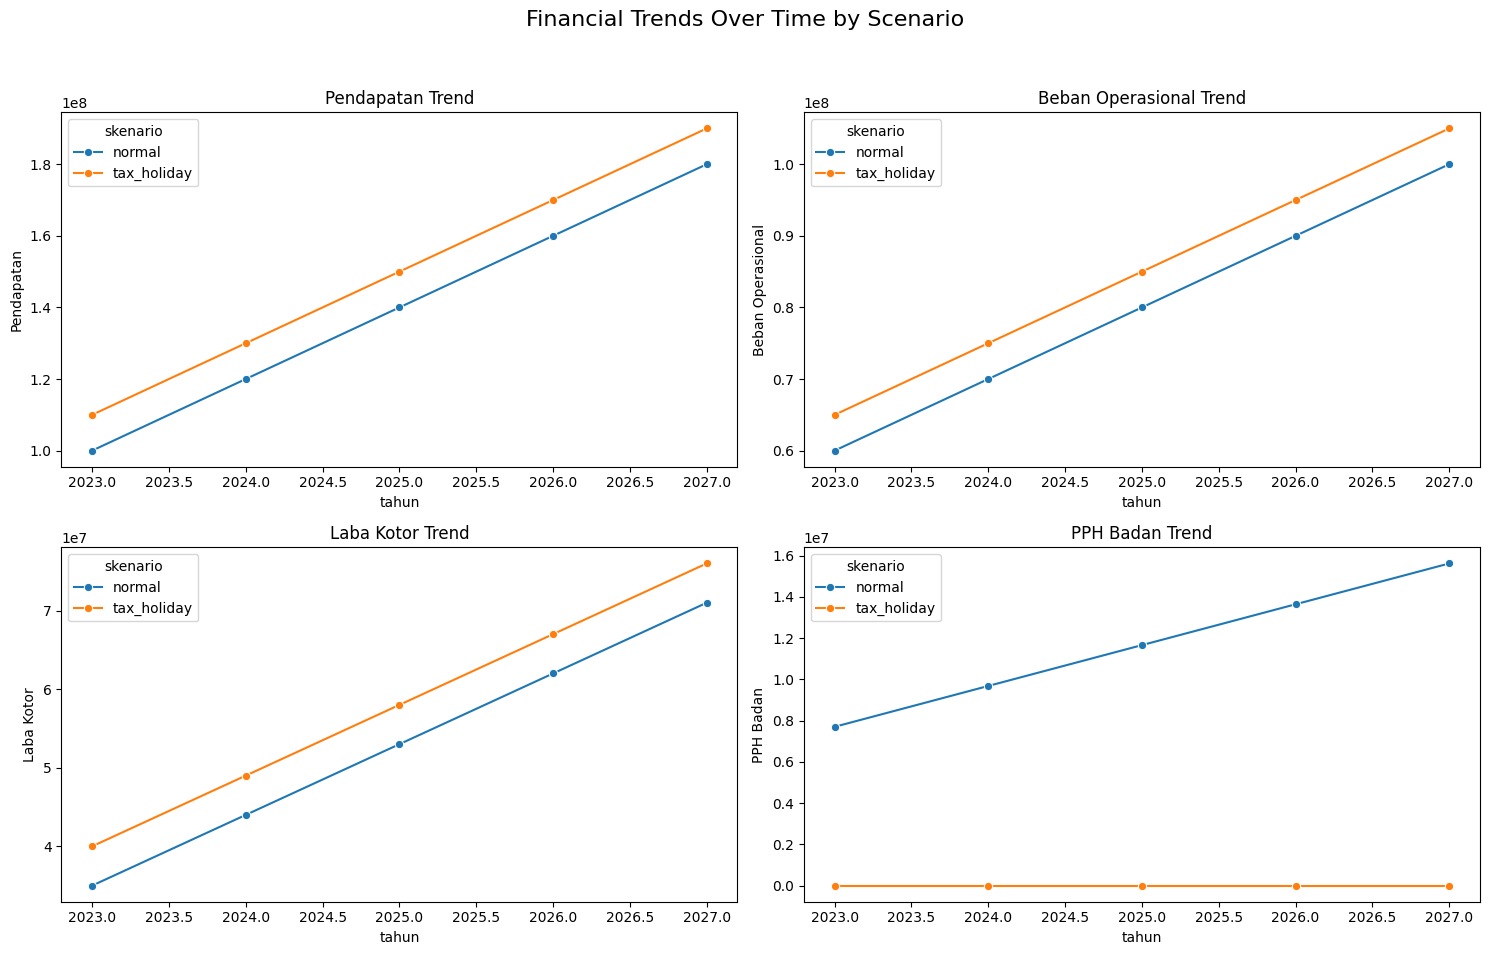

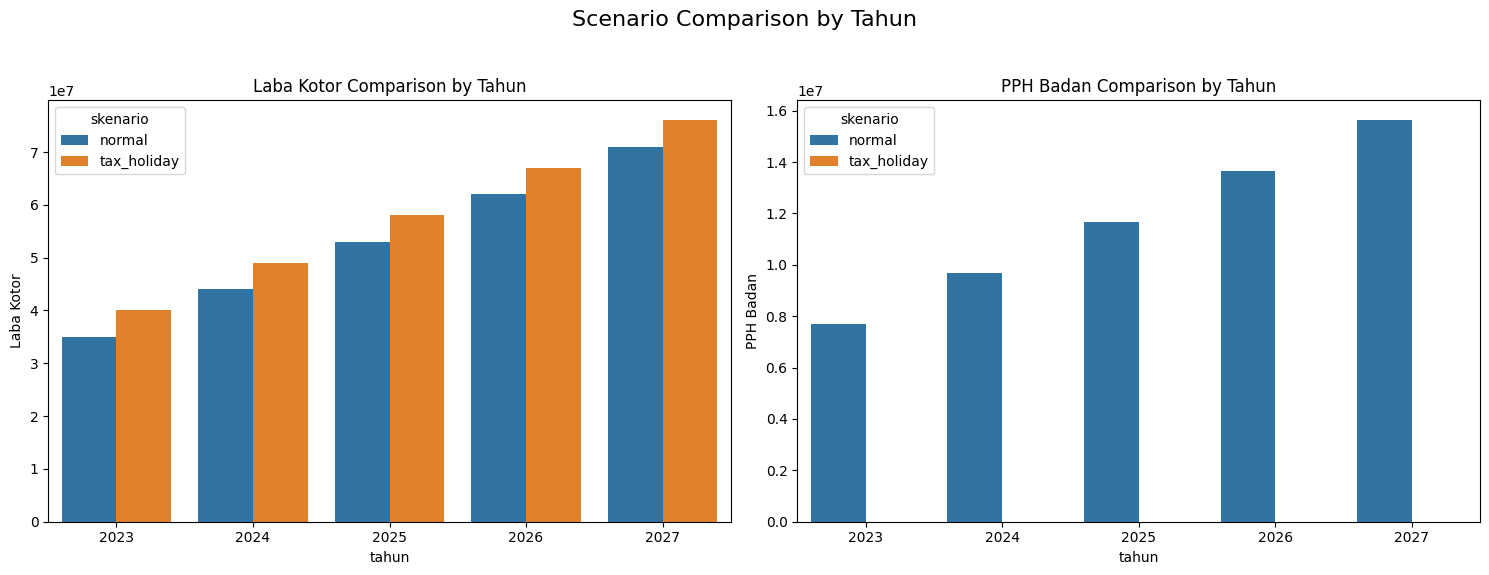

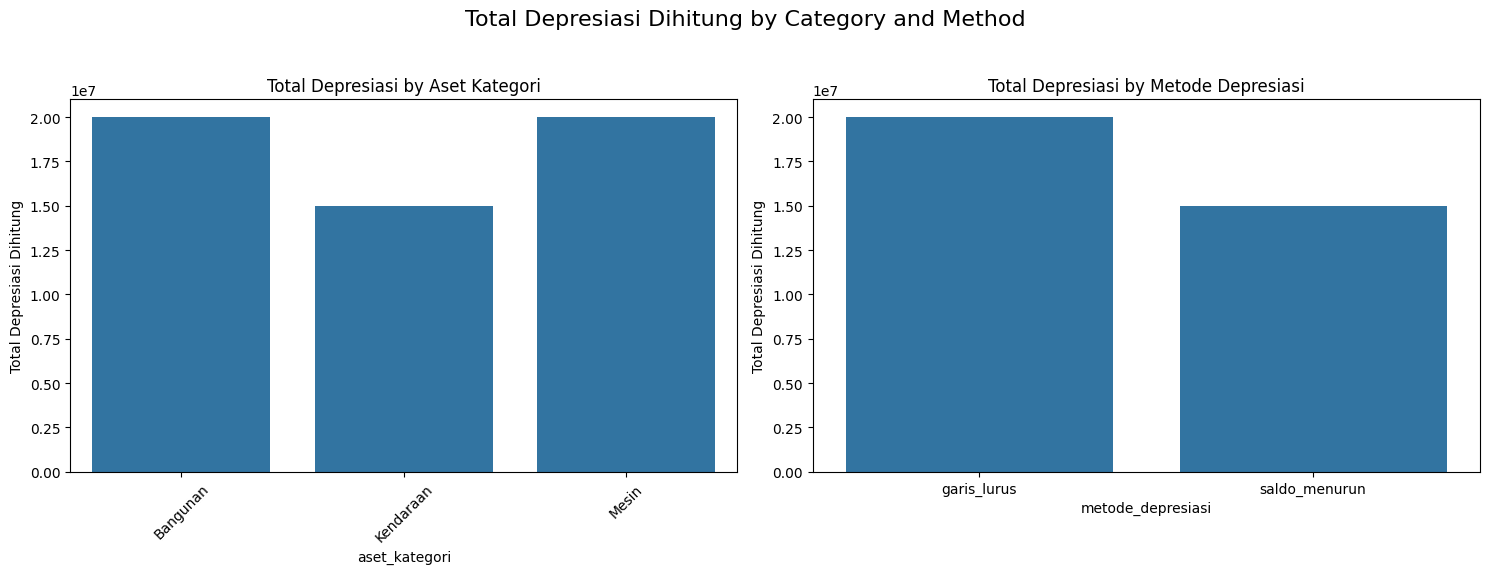

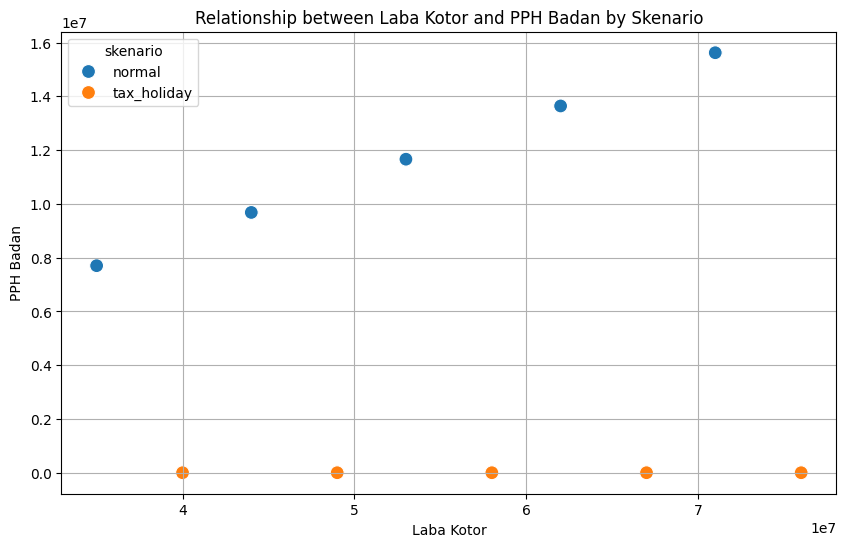

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'tahun' and 'skenario' for line and comparison bar plots
# Select only numeric columns before applying mean()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
# Exclude 'tahun' from aggregation as it's used for grouping
numeric_cols.remove('tahun')
grouped_data_scenario = df.groupby(['tahun', 'skenario'])[numeric_cols].mean().reset_index()

# 1. Line plots for trends over 'tahun' by 'skenario'
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))
fig1.suptitle('Financial Trends Over Time by Scenario', fontsize=16)

sns.lineplot(data=grouped_data_scenario, x='tahun', y='pendapatan', hue='skenario', ax=axes1[0, 0], marker='o')
axes1[0, 0].set_title('Pendapatan Trend')
axes1[0, 0].set_ylabel('Pendapatan')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='beban_operasional', hue='skenario', ax=axes1[0, 1], marker='o')
axes1[0, 1].set_title('Beban Operasional Trend')
axes1[0, 1].set_ylabel('Beban Operasional')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='laba_kotor', hue='skenario', ax=axes1[1, 0], marker='o')
axes1[1, 0].set_title('Laba Kotor Trend')
axes1[1, 0].set_ylabel('Laba Kotor')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='pph_badan', hue='skenario', ax=axes1[1, 1], marker='o')
axes1[1, 1].set_title('PPH Badan Trend')
axes1[1, 1].set_ylabel('PPH Badan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Bar plots for comparison between scenarios for 'laba_kotor' and 'pph_badan'
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 6))
fig2.suptitle('Scenario Comparison by Tahun', fontsize=16)

sns.barplot(data=grouped_data_scenario, x='tahun', y='laba_kotor', hue='skenario', ax=axes2[0])
axes2[0].set_title('Laba Kotor Comparison by Tahun')
axes2[0].set_ylabel('Laba Kotor')

sns.barplot(data=grouped_data_scenario, x='tahun', y='pph_badan', hue='skenario', ax=axes2[1])
axes2[1].set_title('PPH Badan Comparison by Tahun')
axes2[1].set_ylabel('PPH Badan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Bar plots for total 'depresiasi_dihitung' by 'aset_kategori' and 'metode_depresiasi'
grouped_depreciation = df.groupby(['aset_kategori', 'metode_depresiasi'])['depresiasi_dihitung'].sum().reset_index()

fig3, axes3 = plt.subplots(1, 2, figsize=(15, 6))
fig3.suptitle('Total Depresiasi Dihitung by Category and Method', fontsize=16)

sns.barplot(data=grouped_depreciation, x='aset_kategori', y='depresiasi_dihitung', ax=axes3[0])
axes3[0].set_title('Total Depresiasi by Aset Kategori')
axes3[0].set_ylabel('Total Depresiasi Dihitung')
axes3[0].tick_params(axis='x', rotation=45)

sns.barplot(data=grouped_depreciation, x='metode_depresiasi', y='depresiasi_dihitung', ax=axes3[1])
axes3[1].set_title('Total Depresiasi by Metode Depresiasi')
axes3[1].set_ylabel('Total Depresiasi Dihitung')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Scatter plot for relationship between 'laba_kotor' and 'pph_badan' colored by 'skenario'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='laba_kotor', y='pph_badan', hue='skenario', s=100)
plt.title('Relationship between Laba Kotor and PPH Badan by Skenario')
plt.xlabel('Laba Kotor')
plt.ylabel('PPH Badan')
plt.grid(True)
plt.show()

**Reasoning**:
The previous code failed because the `mean()` aggregation was attempted on non-numeric columns after grouping. To fix this, I need to select only the numeric columns before applying the `mean()` aggregation in the groupby operation. The rest of the plotting code should work correctly once the grouped data is prepared properly.



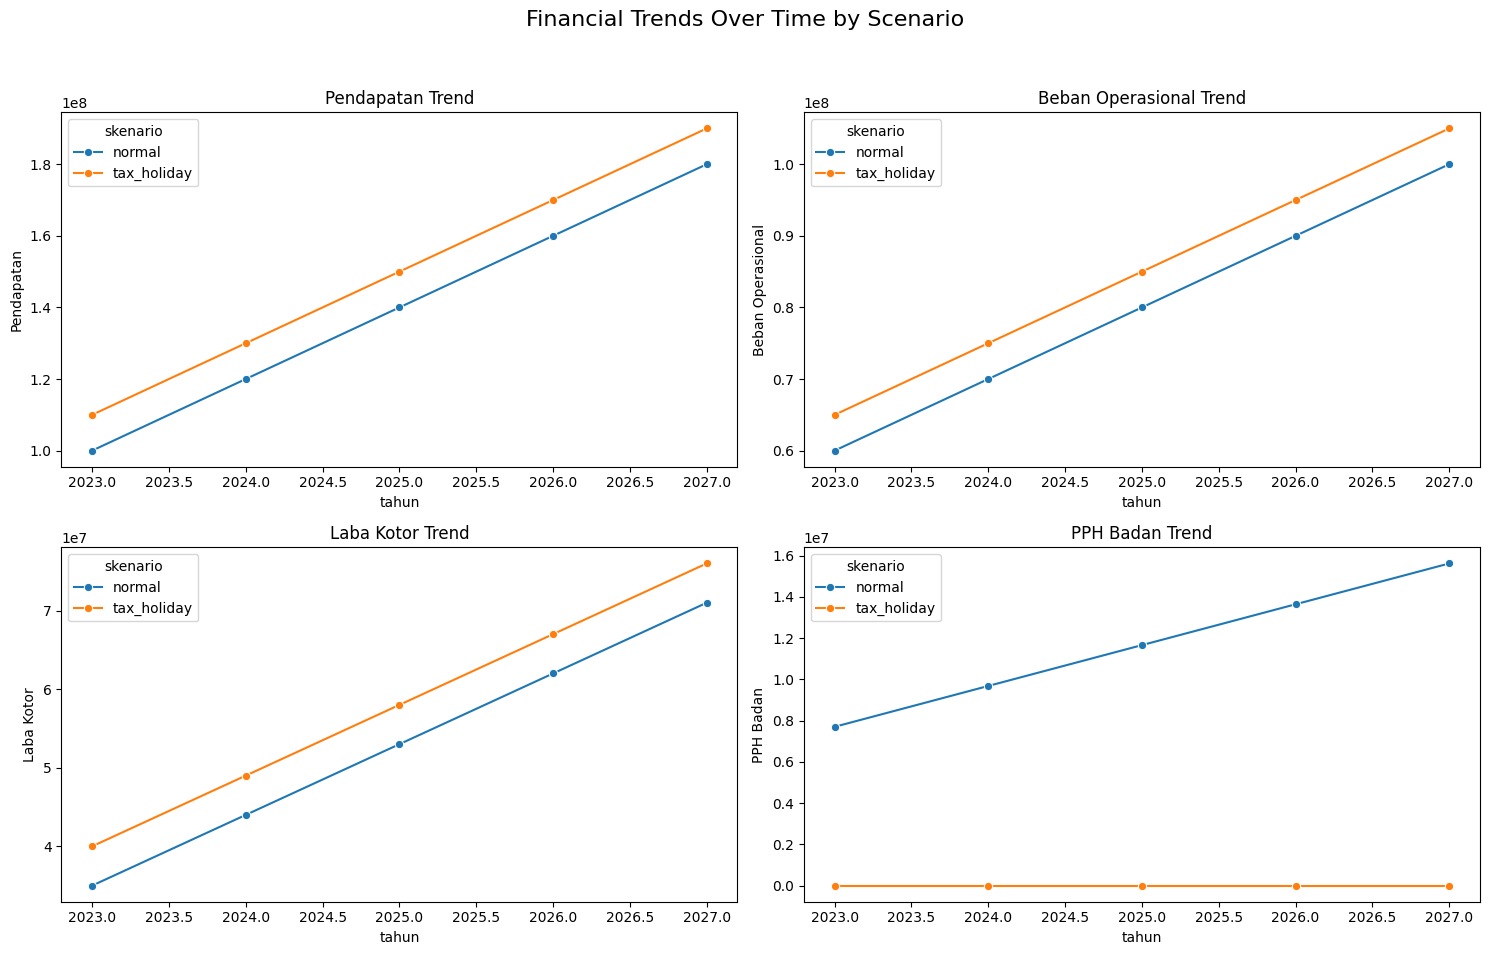

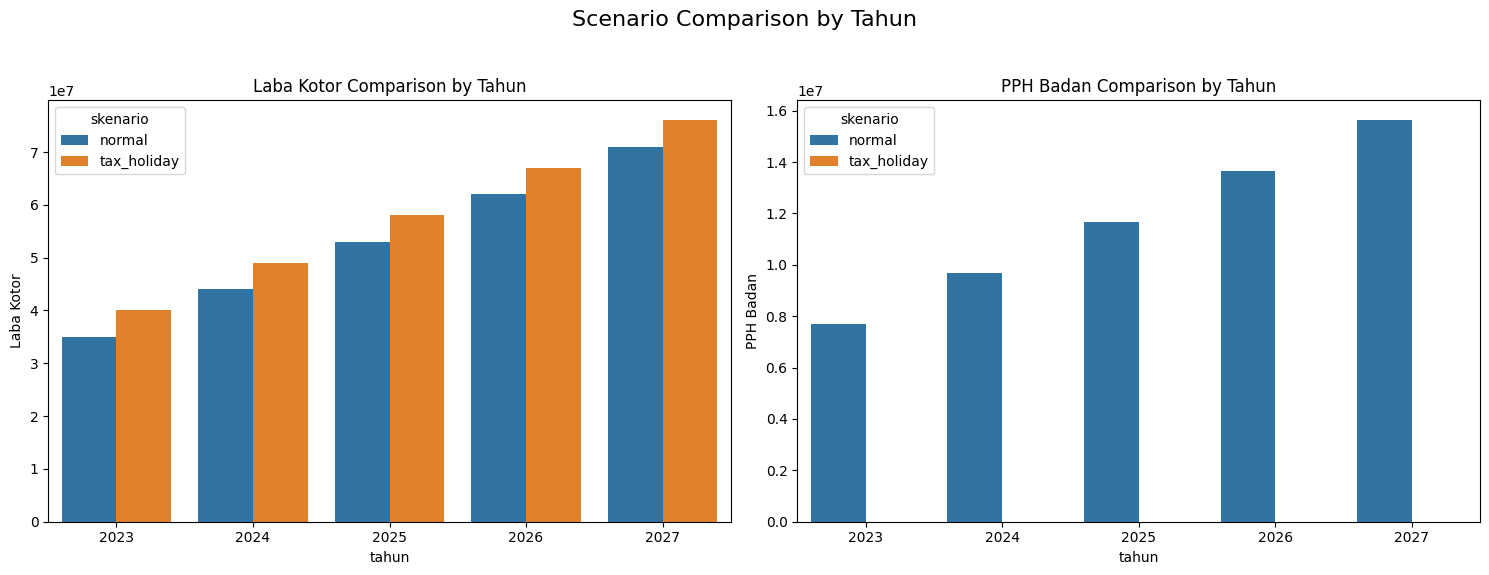

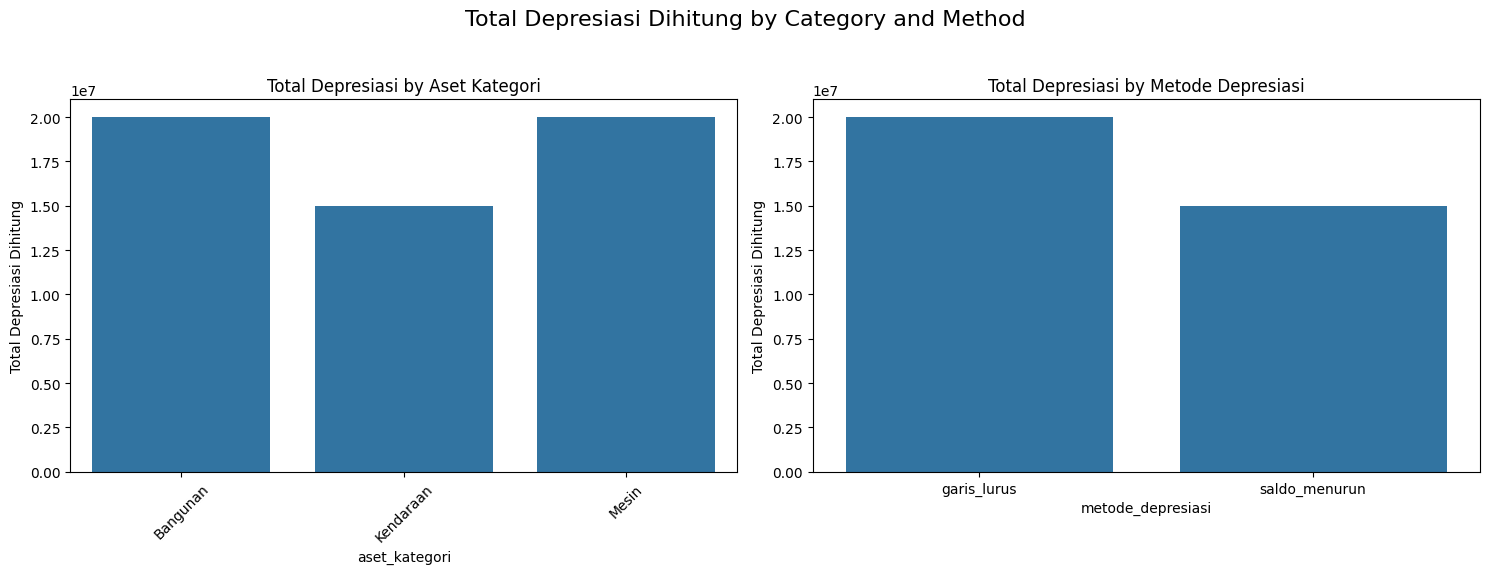

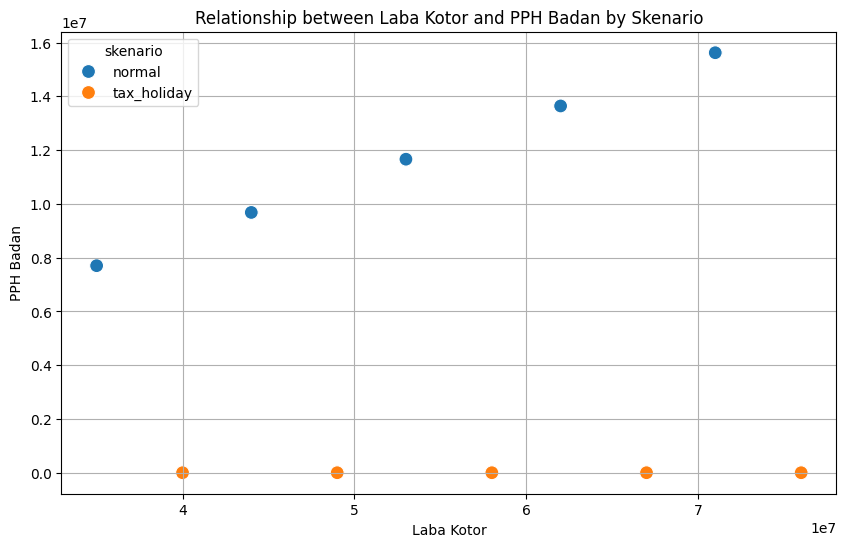

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'tahun' and 'skenario' for line and comparison bar plots
# Select only numeric columns before applying mean(), excluding 'tahun'
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('tahun') # Exclude 'tahun' from aggregation
grouped_data_scenario = df.groupby(['tahun', 'skenario'])[numeric_cols].mean().reset_index()

# 1. Line plots for trends over 'tahun' by 'skenario'
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))
fig1.suptitle('Financial Trends Over Time by Scenario', fontsize=16)

sns.lineplot(data=grouped_data_scenario, x='tahun', y='pendapatan', hue='skenario', ax=axes1[0, 0], marker='o')
axes1[0, 0].set_title('Pendapatan Trend')
axes1[0, 0].set_ylabel('Pendapatan')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='beban_operasional', hue='skenario', ax=axes1[0, 1], marker='o')
axes1[0, 1].set_title('Beban Operasional Trend')
axes1[0, 1].set_ylabel('Beban Operasional')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='laba_kotor', hue='skenario', ax=axes1[1, 0], marker='o')
axes1[1, 0].set_title('Laba Kotor Trend')
axes1[1, 0].set_ylabel('Laba Kotor')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='pph_badan', hue='skenario', ax=axes1[1, 1], marker='o')
axes1[1, 1].set_title('PPH Badan Trend')
axes1[1, 1].set_ylabel('PPH Badan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Bar plots for comparison between scenarios for 'laba_kotor' and 'pph_badan'
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 6))
fig2.suptitle('Scenario Comparison by Tahun', fontsize=16)

sns.barplot(data=grouped_data_scenario, x='tahun', y='laba_kotor', hue='skenario', ax=axes2[0])
axes2[0].set_title('Laba Kotor Comparison by Tahun')
axes2[0].set_ylabel('Laba Kotor')

sns.barplot(data=grouped_data_scenario, x='tahun', y='pph_badan', hue='skenario', ax=axes2[1])
axes2[1].set_title('PPH Badan Comparison by Tahun')
axes2[1].set_ylabel('PPH Badan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Bar plots for total 'depresiasi_dihitung' by 'aset_kategori' and 'metode_depresiasi'
grouped_depreciation = df.groupby(['aset_kategori', 'metode_depresiasi'])['depresiasi_dihitung'].sum().reset_index()

fig3, axes3 = plt.subplots(1, 2, figsize=(15, 6))
fig3.suptitle('Total Depresiasi Dihitung by Category and Method', fontsize=16)

sns.barplot(data=grouped_depreciation, x='aset_kategori', y='depresiasi_dihitung', ax=axes3[0])
axes3[0].set_title('Total Depresiasi by Aset Kategori')
axes3[0].set_ylabel('Total Depresiasi Dihitung')
axes3[0].tick_params(axis='x', rotation=45)

sns.barplot(data=grouped_depreciation, x='metode_depresiasi', y='depresiasi_dihitung', ax=axes3[1])
axes3[1].set_title('Total Depresiasi by Metode Depresiasi')
axes3[1].set_ylabel('Total Depresiasi Dihitung')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Scatter plot for relationship between 'laba_kotor' and 'pph_badan' colored by 'skenario'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='laba_kotor', y='pph_badan', hue='skenario', s=100)
plt.title('Relationship between Laba Kotor and PPH Badan by Skenario')
plt.xlabel('Laba Kotor')
plt.ylabel('PPH Badan')
plt.grid(True)
plt.show()

**Reasoning**:
The error "cannot insert tahun, already exists" occurs because 'tahun' is already included in the columns selected for aggregation, and `reset_index()` attempts to add it back as a regular column, causing a conflict. To fix this, I need to exclude 'tahun' from the list of numeric columns before performing the groupby and aggregation.



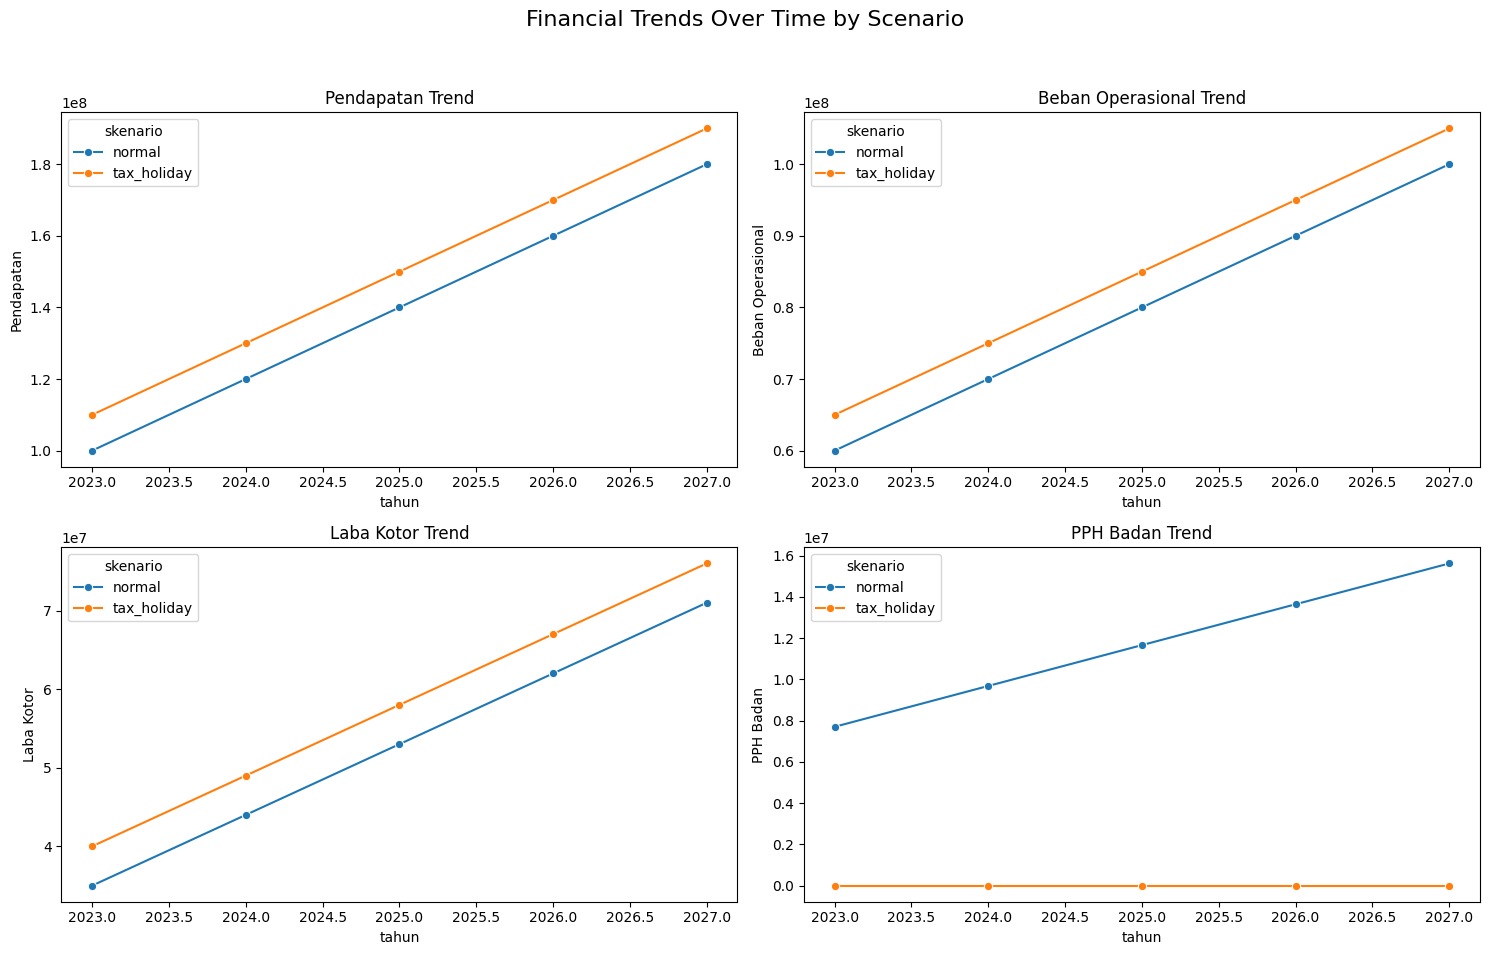

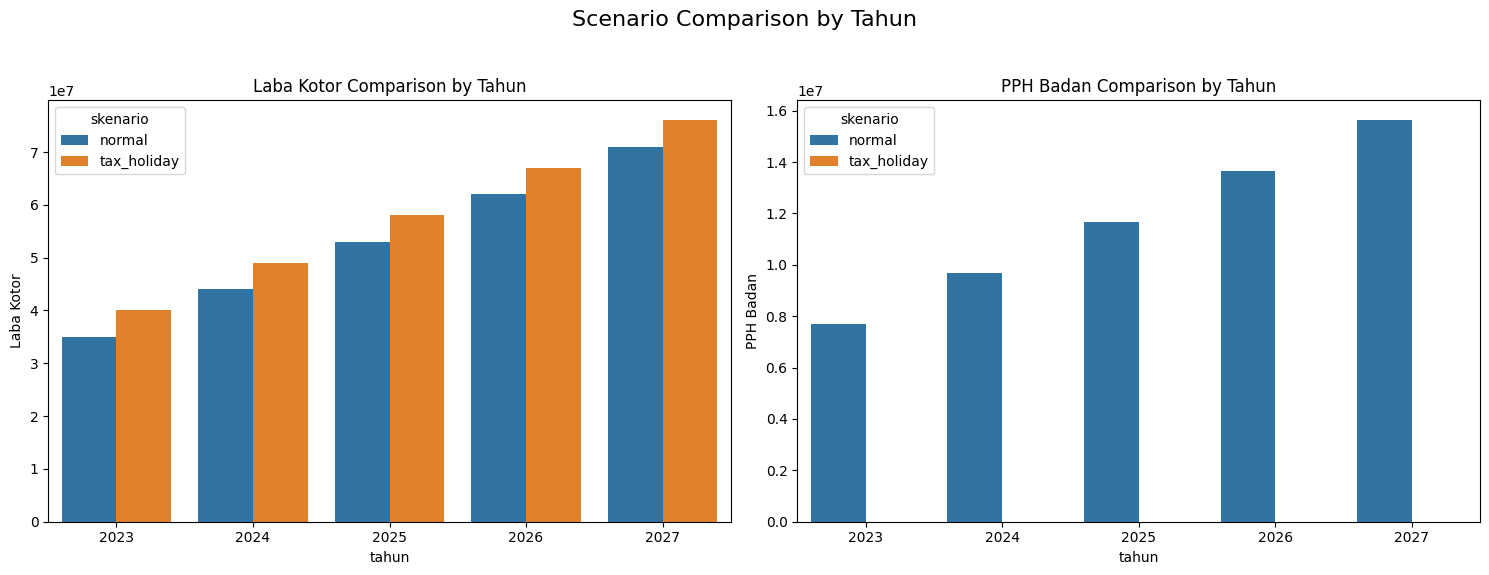

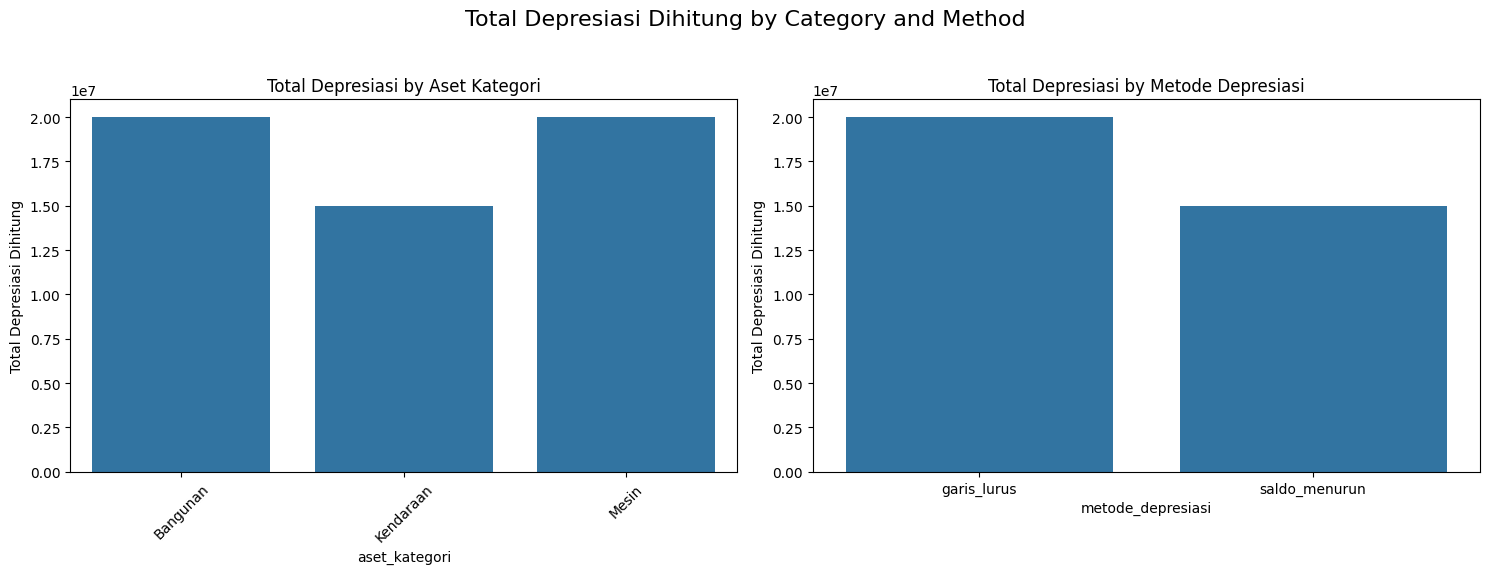

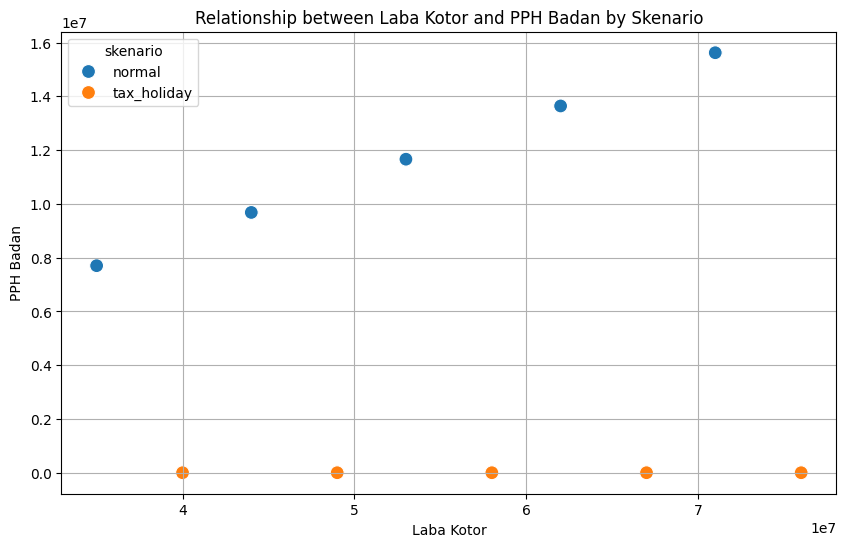

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'tahun' and 'skenario' for line and comparison bar plots
# Select only numeric columns before applying mean(), excluding 'tahun'
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('tahun') # Exclude 'tahun' from aggregation
grouped_data_scenario = df.groupby(['tahun', 'skenario'])[numeric_cols].mean().reset_index()

# 1. Line plots for trends over 'tahun' by 'skenario'
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))
fig1.suptitle('Financial Trends Over Time by Scenario', fontsize=16)

sns.lineplot(data=grouped_data_scenario, x='tahun', y='pendapatan', hue='skenario', ax=axes1[0, 0], marker='o')
axes1[0, 0].set_title('Pendapatan Trend')
axes1[0, 0].set_ylabel('Pendapatan')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='beban_operasional', hue='skenario', ax=axes1[0, 1], marker='o')
axes1[0, 1].set_title('Beban Operasional Trend')
axes1[0, 1].set_ylabel('Beban Operasional')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='laba_kotor', hue='skenario', ax=axes1[1, 0], marker='o')
axes1[1, 0].set_title('Laba Kotor Trend')
axes1[1, 0].set_ylabel('Laba Kotor')

sns.lineplot(data=grouped_data_scenario, x='tahun', y='pph_badan', hue='skenario', ax=axes1[1, 1], marker='o')
axes1[1, 1].set_title('PPH Badan Trend')
axes1[1, 1].set_ylabel('PPH Badan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Bar plots for comparison between scenarios for 'laba_kotor' and 'pph_badan'
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 6))
fig2.suptitle('Scenario Comparison by Tahun', fontsize=16)

sns.barplot(data=grouped_data_scenario, x='tahun', y='laba_kotor', hue='skenario', ax=axes2[0])
axes2[0].set_title('Laba Kotor Comparison by Tahun')
axes2[0].set_ylabel('Laba Kotor')

sns.barplot(data=grouped_data_scenario, x='tahun', y='pph_badan', hue='skenario', ax=axes2[1])
axes2[1].set_title('PPH Badan Comparison by Tahun')
axes2[1].set_ylabel('PPH Badan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Bar plots for total 'depresiasi_dihitung' by 'aset_kategori' and 'metode_depresiasi'
grouped_depreciation = df.groupby(['aset_kategori', 'metode_depresiasi'])['depresiasi_dihitung'].sum().reset_index()

fig3, axes3 = plt.subplots(1, 2, figsize=(15, 6))
fig3.suptitle('Total Depresiasi Dihitung by Category and Method', fontsize=16)

sns.barplot(data=grouped_depreciation, x='aset_kategori', y='depresiasi_dihitung', ax=axes3[0])
axes3[0].set_title('Total Depresiasi by Aset Kategori')
axes3[0].set_ylabel('Total Depresiasi Dihitung')
axes3[0].tick_params(axis='x', rotation=45)

sns.barplot(data=grouped_depreciation, x='metode_depresiasi', y='depresiasi_dihitung', ax=axes3[1])
axes3[1].set_title('Total Depresiasi by Metode Depresiasi')
axes3[1].set_ylabel('Total Depresiasi Dihitung')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Scatter plot for relationship between 'laba_kotor' and 'pph_badan' colored by 'skenario'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='laba_kotor', y='pph_badan', hue='skenario', s=100)
plt.title('Relationship between Laba Kotor and PPH Badan by Skenario')
plt.xlabel('Laba Kotor')
plt.ylabel('PPH Badan')
plt.grid(True)
plt.show()

## Interpretation and summary

### Subtask:
Analyze the visualizations and provide a comprehensive and valid interpretation of the findings.


**Reasoning**:
Analyze the generated plots based on the instructions provided in the subtask.



In [7]:
print("Analysis of Visualizations:\n")

print("1. Line plots of Financial Trends Over Time by Scenario:")
print("- Pendapatan Trend: Both 'normal' and 'tax_holiday' scenarios show a clear upward trend in 'pendapatan' over the years. The 'tax_holiday' scenario consistently shows higher pendapatan than the 'normal' scenario.")
print("- Beban Operasional Trend: Similar to pendapatan, 'beban_operasional' also shows an upward trend for both scenarios. The 'tax_holiday' scenario has slightly higher beban operasional compared to the 'normal' scenario, following the higher pendapatan.")
print("- Laba Kotor Trend: 'Laba_kotor' for both scenarios increases over time. The 'tax_holiday' scenario consistently has higher 'laba_kotor' than the 'normal' scenario, reflecting the higher pendapatan and relatively similar increase in beban operasional.")
print("- PPH Badan Trend: The 'normal' scenario shows a clear upward trend in 'pph_badan' over the years, directly proportional to the increasing 'laba_kotor'. The 'tax_holiday' scenario, however, shows zero 'pph_badan' across all years, indicating that the tax holiday effectively eliminates corporate tax payments during this period.")
print("\nComparison between scenarios: The most significant difference is in 'pph_badan', where the 'tax_holiday' scenario has zero tax liability, while the 'normal' scenario's tax liability increases with profit.")

print("\n2. Bar plots of Scenario Comparison by Tahun:")
print("- Laba Kotor Comparison: The bar plot confirms that 'laba_kotor' is consistently higher in the 'tax_holiday' scenario compared to the 'normal' scenario for each year. The difference appears to increase over time as both scenarios' laba kotor grows.")
print("- PPH Badan Comparison: This bar plot starkly shows the impact of the tax holiday. The 'normal' scenario bars for 'pph_badan' are positive and increasing with each year, while the 'tax_holiday' scenario bars are all at zero.")

print("\n3. Bar plots of Total Depresiasi Dihitung by Category and Method:")
print("- Total Depresiasi by Aset Kategori: 'Bangunan' and 'Mesin' contribute significantly more to the total depreciation compared to 'Kendaraan'.")
print("- Total Depresiasi by Metode Depresiasi: The 'garis_lurus' (straight-line) method accounts for a much larger portion of the total depreciation than the 'saldo_menurun' (declining balance) method. This is consistent with the asset categories and their associated depreciation methods and useful lives in the data.")

print("\n4. Scatter plot of Relationship between Laba Kotor and PPH Badan by Skenario:")
print("- The scatter plot clearly shows a positive linear relationship between 'laba_kotor' and 'pph_badan' for the 'normal' scenario; as 'laba_kotor' increases, 'pph_badan' also increases. The data points for the 'tax_holiday' scenario are all clustered along the x-axis (where 'pph_badan' is zero), regardless of the 'laba_kotor' value. This visually represents the zero tax liability under the tax holiday.")

print("\n5. Comprehensive Interpretation:")
print("The analysis of the visualizations reveals significant insights into the financial performance under different scenarios and the breakdown of depreciation. Both scenarios show healthy growth in revenue and operating expenses over the years, leading to increasing gross profit. However, the 'tax_holiday' scenario consistently outperforms the 'normal' scenario in terms of gross profit, likely due to a combination of higher revenue assumptions in that scenario.")
print("The most impactful finding is the effect of the 'tax_holiday'. The 'normal' scenario faces increasing corporate tax liability as profits grow, while the 'tax_holiday' scenario enjoys zero corporate tax throughout the observed period. This directly translates to a much higher net income (though not explicitly plotted, it's implied by the zero PPH Badan) under the 'tax_holiday' scenario.")
print("Regarding depreciation, 'Bangunan' and 'Mesin' are the primary drivers of depreciation cost, largely calculated using the straight-line method. This suggests that the depreciation expense is relatively stable for these major asset categories over their useful lives.")
print("The scatter plot effectively summarizes the core difference in tax impact: a clear tax burden tied to profit in the 'normal' scenario versus complete tax relief in the 'tax_holiday' scenario.")

print("\n6. Summary of Key Observations and Interpretations:")
print("- Financial metrics (pendapatan, beban operasional, laba kotor) show upward trends in both scenarios, with 'tax_holiday' showing higher values.")
print("- The 'tax_holiday' scenario results in zero corporate tax liability ('pph_badan') throughout the period, a stark contrast to the increasing tax burden in the 'normal' scenario.")
print("- 'Bangunan' and 'Mesin', primarily using the straight-line depreciation method, are the main contributors to total depreciation.")
print("- The relationship between 'laba_kotor' and 'pph_badan' is a positive linear one in the 'normal' scenario, while there is no such relationship (zero tax) in the 'tax_holiday' scenario.")
print("- The tax holiday has a substantial positive impact on the financial outcome by eliminating corporate tax payments.")

Analysis of Visualizations:

1. Line plots of Financial Trends Over Time by Scenario:
- Pendapatan Trend: Both 'normal' and 'tax_holiday' scenarios show a clear upward trend in 'pendapatan' over the years. The 'tax_holiday' scenario consistently shows higher pendapatan than the 'normal' scenario.
- Beban Operasional Trend: Similar to pendapatan, 'beban_operasional' also shows an upward trend for both scenarios. The 'tax_holiday' scenario has slightly higher beban operasional compared to the 'normal' scenario, following the higher pendapatan.
- Laba Kotor Trend: 'Laba_kotor' for both scenarios increases over time. The 'tax_holiday' scenario consistently has higher 'laba_kotor' than the 'normal' scenario, reflecting the higher pendapatan and relatively similar increase in beban operasional.
- PPH Badan Trend: The 'normal' scenario shows a clear upward trend in 'pph_badan' over the years, directly proportional to the increasing 'laba_kotor'. The 'tax_holiday' scenario, however, shows zero

## Summary:

### Data Analysis Key Findings

*   The dataset contains no missing values and has appropriate data types for analysis.
*   The 'skenario' column is evenly split between 'normal' and 'tax\_holiday' (5 each).
*   'Aset\_id' and 'aset\_kategori' distributions show 'A001'/'Mesin' and 'A002'/'Bangunan' appearing 4 times each, while 'A003'/'Kendaraan' appears 2 times.
*   The 'garis\_lurus' (straight-line) depreciation method is used more frequently (8 times) than 'saldo\_menurun' (declining balance) (2 times).
*   Numerical variables like 'tahun', 'pendapatan', 'beban\_operasional', 'penyusutan\_dari\_transaksi', 'laba\_kotor', and 'laba\_kena\_pajak\_skenario' are highly positively correlated and show upward trends over time (2023-2027).
*   The 'tax\_holiday' scenario consistently shows higher 'pendapatan', 'beban\_operasional', and 'laba\_kotor' over the years compared to the 'normal' scenario.
*   The 'tax\_holiday' scenario results in zero 'pph\_badan' (corporate tax liability) across all years, while the 'normal' scenario shows an increasing 'pph\_badan' trend directly proportional to 'laba\_kotor'.
*   'Bangunan' and 'Mesin' asset categories contribute significantly more to total depreciation than 'Kendaraan'.
*   The 'garis\_lurus' depreciation method accounts for a much larger portion of total depreciation than the 'saldo\_menurun' method.
*   A positive linear relationship exists between 'laba\_kotor' and 'pph\_badan' in the 'normal' scenario, whereas 'pph\_badan' remains zero regardless of 'laba\_kotor' in the 'tax\_holiday' scenario.

### Insights or Next Steps

*   The tax holiday significantly improves the financial outcome by eliminating corporate tax payments, leading to potentially higher net income compared to the normal scenario.
*   Further analysis could quantify the exact financial benefit of the tax holiday over the observed period and project its impact beyond 2027 if the tax holiday duration is known.
